# WEEK 7:DAY 1- Introduction to Machine Learning Pipeline
Machine learning pipeline is used to help automate machine learning overflow. They operate by enabling  a sequence of data
to be transformed and correlated together in a model that can be testedand evaluatedto achieve an outcomewhether positive or negative.
 The main objective of having a proper pipeline for any ML model is to exercise control over it .

In [7]:
# importing the required libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [8]:
#loading the dataset
wine = pd.read_csv('winequality-red.csv', sep =';')


In [10]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
# preproccessing data
bins =(2,6.5,8)
group_names =['bad' , 'good']
wine['quality'] = pd.cut(wine['quality'], bins= bins, labels = group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [14]:
label_quality = LabelEncoder()

In [15]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [16]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [17]:
wine.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

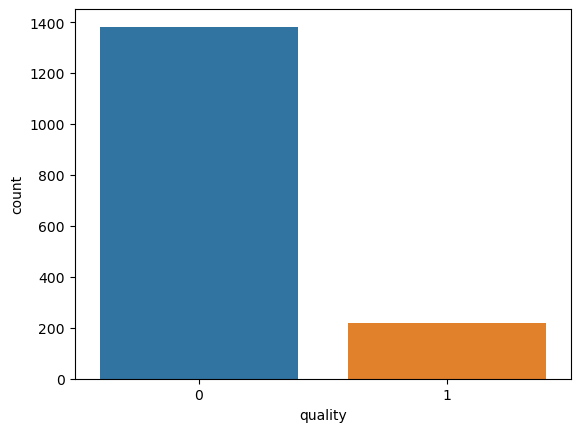

In [18]:
sns.countplot(wine.quality)

In [19]:
#declaring the features and output variables
X = wine.drop('quality',axis =1)
y = wine.quality

In [20]:
#train and test splitting of data
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size =0.2, random_state=42)

In [41]:
# Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9
522,8.2,0.390,0.49,2.3,0.099,47.0,133.0,0.99790,3.38,0.99,9.8
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6
1404,8.0,0.500,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7
1055,8.2,0.640,0.27,2.0,0.095,5.0,77.0,0.99747,3.13,0.62,9.1
277,11.5,0.180,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1


In [22]:
E = pd.DataFrame((X_train), columns =pd.DataFrame( wine.columns.drop('quality')))

In [37]:
E

,"(fixed acidity,)","(volatile acidity,)","(citric acid,)","(residual sugar,)","(chlorides,)","(free sulfur dioxide,)","(total sulfur dioxide,)","(density,)","(pH,)","(sulphates,)","(alcohol,)"
0,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
1,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272
2,1.494753,-0.784347,1.011045,-0.526378,0.599272,-0.957960,-0.991742,0.768655,-0.075669,0.515517,-0.587390
3,0.276351,0.861811,-0.063831,-0.665729,-0.009085,0.012020,-0.718427,0.089488,0.054238,-1.088733,-0.967516
4,0.044274,2.814880,-0.626861,2.399985,-0.313264,-0.472970,0.222990,1.199871,0.379008,-0.974144,-0.492358
...,...,...,...,...,...,...,...,...,...,...,...
1274,0.450408,0.387494,-1.394630,-0.456703,-0.617442,-1.054958,-1.113215,0.499144,-0.855116,-0.172018,-0.017201
1275,-0.071764,0.582801,-0.882784,-0.317352,-0.313264,0.885003,0.405199,-0.212363,-0.140623,0.515517,0.457957
1276,-0.651956,0.499098,-1.087522,0.100700,-0.232149,-0.084978,1.164407,0.369779,1.288361,-0.687670,-0.872484
1277,-0.245822,-1.844584,0.396831,-0.596054,-0.698557,-0.860962,-0.961374,-1.182601,0.054238,0.801991,1.408272


# Random Forest Classifier

In [33]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [40]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [42]:
# time to see how our model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.72      0.55      0.63        47

    accuracy                           0.90       320
   macro avg       0.82      0.76      0.79       320
weighted avg       0.90      0.90      0.90       320

[[263  10]
 [ 21  26]]


# SVM Classifier

In [26]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [27]:
# lets see how the model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320

[[273   0]
 [ 46   1]]


# Neural Network

In [28]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter = 500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [29]:
# lets see how the model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       273
           1       0.57      0.28      0.37        47

    accuracy                           0.86       320
   macro avg       0.73      0.62      0.65       320
weighted avg       0.84      0.86      0.84       320

[[263  10]
 [ 34  13]]


In [35]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test,pred_rfc)

In [36]:
cm

0.896875

In [42]:
Xnew = [[7.3,0.58,0.00,2.0,0.065,15.0,21.0,0.9946,3.36,0.47,10.0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
ynew

array([0])